In [ ]:
#!pip install yfinance
import pandas as pd 
import yfinance as yf # import libraries

# Q1

In [ ]:
GLD = yf.download('GLD', 
                       start='2020-06-01', 
                       end='2021-01-01',
                       progress=False)
# Import gld gold ETF

In [ ]:
#iShares MSCI India ETF
INDA = yf.download('INDA', 
                       start='2020-06-01', 
                       end='2021-01-01',
                       progress=False)

In [ ]:
#iShares MSCI India ETF
BTC = yf.download('BTC-USD', 
                       start='2020-06-01', 
                       end='2021-01-01',
                       progress=False)

# DATA FRAMES

1. GLD -  gold Exchange Traded Fund.
2. INDA - iShares MSCI India ETF
3. BTC - Bitcoin USA

# Q2 and Q3

In [ ]:
# Get daily returns
GLD['daily_return'] = GLD['Adj Close'].pct_change()
INDA['daily_return'] = INDA['Adj Close'].pct_change()
BTC['daily_return'] = BTC['Adj Close'].pct_change()

In [ ]:
GLD.dropna(inplace=True)
INDA.dropna(inplace=True)
BTC.dropna(inplace=True)

In [ ]:
print(GLD['daily_return'].tail(2),'GLD daily_return')
print(INDA['daily_return'].tail(2),'INDA daily_return')
print(BTC['daily_return'].tail(2),'BTC daily_return')

Date
2020-12-30    0.007655
2020-12-31    0.003714
Name: daily_return, dtype: float64 GLD daily_return
Date
2020-12-30    0.005769
2020-12-31    0.002993
Name: daily_return, dtype: float64 INDA daily_return
Date
2020-12-31    0.005574
2021-01-01    0.012842
Name: daily_return, dtype: float64 BTC daily_return


In [ ]:
 from scipy.stats import kurtosis 


In [ ]:
print(kurtosis(GLD['daily_return']),',GLD kurtosis')
print(kurtosis(INDA['daily_return']),',INDA kurtosis')
print(kurtosis(BTC['daily_return']),',BTC kurtosis')

4.767290661619432 ,GLD kurtosis
7.185712904434888 ,INDA kurtosis
3.180386685498674 ,BTC kurtosis


# Q4

 Daily Price For GLD


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


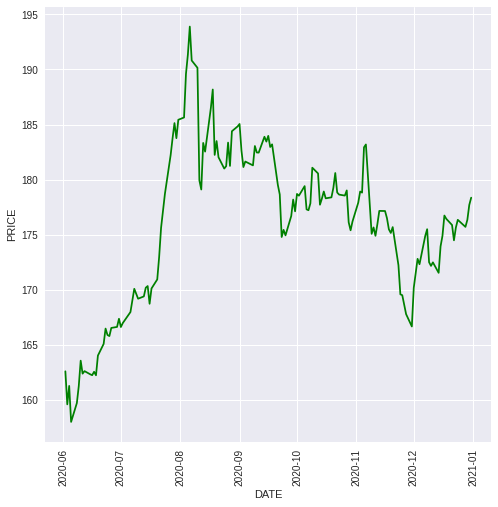

 Daily Price For INDA


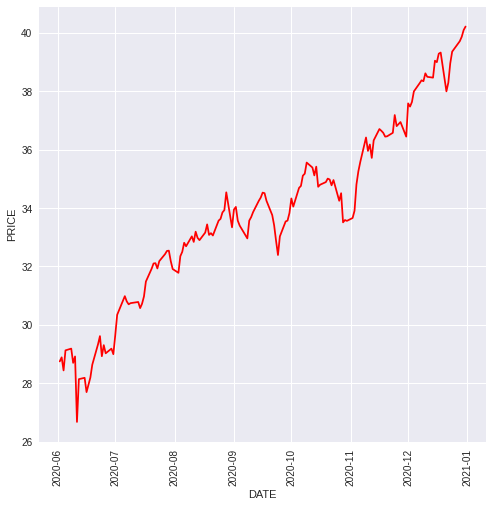

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

print(" Daily Price For GLD")
plt.figure(figsize=(8,8))
plt.plot(GLD['Adj Close'],color='green')
plt.xticks(rotation=90)
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

print(" Daily Price For INDA")
plt.figure(figsize=(8,8))
plt.plot(INDA['Adj Close'],color='red')
plt.xticks(rotation=90)
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [ ]:
import warnings
#!pip install copulas

warnings.filterwarnings('ignore')
from copulas.multivariate import GaussianMultivariate
# Fit a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(GLD)

In [ ]:
synthetic_data = copula.sample(len(GLD))


In [ ]:
GLD.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2020-06-02,163.889999,164.080002,161.860001,162.600006,162.600006,10388900,-0.006477
2020-06-03,160.339996,160.899994,158.820007,159.600006,159.600006,17000500,-0.018450


In [ ]:
synthetic_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
0,181.357353,182.225358,179.552991,179.997395,180.000850,1.111110e+07,-0.011978
1,175.572209,176.994350,175.847743,177.353920,177.357253,9.561125e+06,0.011136


In [ ]:
copula = GaussianMultivariate()
copula.fit(INDA)

In [ ]:
synthetic_data = copula.sample(len(INDA))
synthetic_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
0,27.802785,27.997557,27.468959,27.638778,27.602921,4.655280e+06,0.001277
1,32.494273,32.428179,32.023945,31.960469,31.925635,6.432536e+06,0.001577


# Q5


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df_log_shift = GLD['Close'] - GLD['Close'].shift()
df_log_shift.dropna(inplace=True)

In [ ]:
model = ARIMA(df_log_shift, order=(2,1,2))
results = model.fit(disp=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


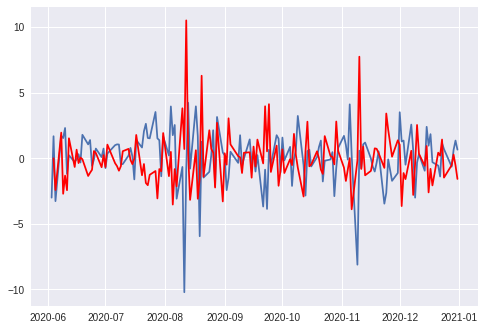

In [ ]:
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


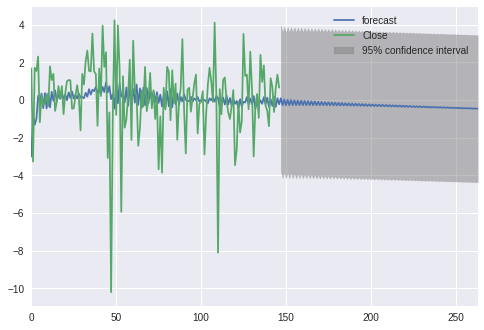

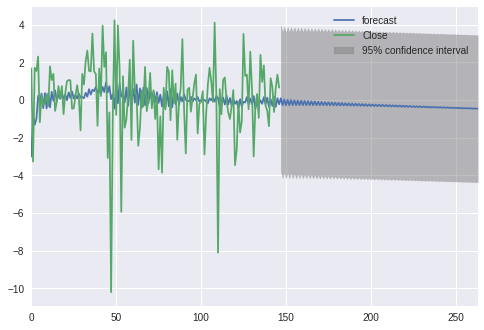

In [ ]:
results.plot_predict(1,264)


In [ ]:
import pyflux as pf


In [ ]:
#!pip install pyflux
#!pip install pandas==0.25.1
returns_GLD= pd.DataFrame(np.diff(np.log(GLD['Adj Close'].values)))
model_GLD = pf.GARCH(returns_GLD,p=1,q=1)
x = model_GLD.fit()
print(x.summary())

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: 0                                   Method: MLE                                       
Start Date: 1                                           Log Likelihood: 456.4974                          
End Date: 147                                           AIC: -904.9948                                    
Number of observations: 147                             BIC: -893.0331                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

# Q6 and Q7


In [ ]:
#creating the train and validation set
train = GLD[:int(0.8*(len(GLD)))]
valid = GLD[int(0.8*(len(GLD))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [ ]:
prediction

array([[1.76465224e+02, 1.77179728e+02, 1.75607939e+02, 1.76484047e+02,
        1.76484047e+02, 9.53511108e+06, 4.59495119e-05],
       [1.76549301e+02, 1.77254618e+02, 1.75559230e+02, 1.76484332e+02,
        1.76484332e+02, 1.04367586e+07, 1.02295088e-04],
       [1.76575232e+02, 1.77327041e+02, 1.75565091e+02, 1.76523966e+02,
        1.76523966e+02, 1.10523764e+07, 3.23396129e-04],
       [1.76641786e+02, 1.77408953e+02, 1.75610934e+02, 1.76586366e+02,
        1.76586366e+02, 1.14272853e+07, 4.50628036e-04],
       [1.76717921e+02, 1.77497503e+02, 1.75675497e+02, 1.76662605e+02,
        1.76662605e+02, 1.16747308e+07, 5.28972462e-04],
       [1.76803060e+02, 1.77589989e+02, 1.75751180e+02, 1.76745622e+02,
        1.76745622e+02, 1.18396719e+07, 5.67477169e-04],
       [1.76891321e+02, 1.77683163e+02, 1.75831915e+02, 1.76831245e+02,
        1.76831245e+02, 1.19534933e+07, 5.82514701e-04],
       [1.76980063e+02, 1.77775139e+02, 1.75914266e+02, 1.76916887e+02,
        1.76916887e+02, 1

In [ ]:
#!pip install pyflux
#!pip install pandas==0.25.1
returns_INDA= pd.DataFrame(np.diff(np.log(INDA['Adj Close'].values)))
model_INDA = pf.GARCH(returns_INDA,p=1,q=1)
x = model_INDA.fit()
print(x.summary())

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: 0                                   Method: MLE                                       
Start Date: 1                                           Log Likelihood: 421.9879                          
End Date: 147                                           AIC: -835.9757                                    
Number of observations: 147                             BIC: -824.014                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0001                                                           
q(1)                                 

In [ ]:
#creating the train and validation set
train = INDA[:int(0.8*(len(INDA)))]
valid = INDA[int(0.8*(len(INDA))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
prediction

array([[ 3.67429273e+01,  3.68489733e+01,  3.65803572e+01,
         3.67299639e+01,  3.66971610e+01,  3.81466160e+06,
         8.75949298e-04],
       [ 3.66287614e+01,  3.67766043e+01,  3.64967945e+01,
         3.66633235e+01,  3.66307803e+01,  3.89003653e+06,
        -2.36923501e-03],
       [ 3.66283572e+01,  3.67641304e+01,  3.64879868e+01,
         3.66542047e+01,  3.66207976e+01,  3.93845306e+06,
        -5.92783082e-04],
       [ 3.65939400e+01,  3.67344057e+01,  3.64543683e+01,
         3.66214154e+01,  3.65878256e+01,  3.94674655e+06,
        -1.32188687e-03],
       [ 3.65699418e+01,  3.67091522e+01,  3.64289329e+01,
         3.65967813e+01,  3.65628066e+01,  3.96834093e+06,
        -1.06521049e-03],
       [ 3.65418214e+01,  3.66818266e+01,  3.64001849e+01,
         3.65685999e+01,  3.65343730e+01,  3.98091139e+06,
        -1.17234558e-03],
       [ 3.65147097e+01,  3.66547712e+01,  3.63722971e+01,
         3.65412876e+01,  3.65068089e+01,  3.99447866e+06,
        -1.1422905